In [1]:
import numpy as np
import pandas as pd
from jupyterthemes import jtplot

import japanize_matplotlib

# Chapter1: データについて
## 1.1. データの大きさ 

In [2]:
np.random.random((3,3))

array([[0.77303129, 0.21992484, 0.71348364],
       [0.89521704, 0.12712254, 0.29486694],
       [0.51947617, 0.32690593, 0.49433159]])

In [3]:
df = pd.DataFrame(np.random.random((3,3)))

In [4]:
df.shape

(3, 3)

## 1.2. 変数の種類
### 1.2.1. 質的変数と量的変数

- 質的変数: 満足度などの尺度がある変数, 特に２つの変数のものは`2値変数`と言う.
- 量的変数: 身長や点数などの量を表す変数

### 1.2.2. 尺度水準

- 名義尺度:単に区別するための変数   
DBのIDみたいなもので大小関係や演算結果などは意味を持たない
- 順序尺度:順序関係や大小関係に意味のある変数  
順位の大小や順序には意味はあるが順位間の点数の差や比には関係しない
- 間隔尺度:大小関係に加え差に意味がある変数  
ex. 西暦・温度など
- 比例尺度:大小・差・比全てに意味のある変数  
ex. 長さ重さなど

### 1.2.3. 離散型変数と連続型変数

- 離散型
ex. サイコロの目
- 連続型
ex. 身長とか体重とか

### 1.3. まとめ

変数の分類は割と大事, Pandasで統計量などは取れるが変数の分類は自らやらなければならない

# Chapter2: １次元データの整理

In [5]:
# Jupyterでの小数点以下を３桁に抑える
%precision 3

'%.3f'

In [6]:
# pandas, DataFrameでの小数点以下を３桁に抑える
pd.set_option('precision',3)

In [7]:
df2_scores_em=pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')

In [8]:
df2_scores_em.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [9]:
scores=np.array(df2_scores_em['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [10]:
scores_df=pd.DataFrame({'点数':scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='生徒'))

In [11]:
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 2.1. データの中心の指標
代表値とも呼ばれる. ex.平均,中央値など.
### 2.1.1. 平均値

In [12]:
sum(scores)/len(scores)

55.0

In [13]:
np.mean(scores)

55.0

In [14]:
scores_df.mean()

点数    55.0
dtype: float64

### 2.1.2. 中央値

In [15]:
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [16]:
np.median(sorted_scores)

56.5

In [17]:
scores_df['点数'].median()

56.5

### 2.1.3. 最頻値

In [18]:
scores_df['点数'].mode()

0    65
dtype: int64

## 2.2. データのバラつきの座標
分散とか標準偏差の話
### 2.2.1. 分散と標準偏差
#### 偏差:diviation
平均からどれだけ離れているか

In [19]:
mean = np.mean(scores)

In [20]:
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [21]:
another_scores=[50,60,58,54,51,56,57,53,52,59]
another_mean=np.mean(another_scores)

In [22]:
another_deviation=another_scores-another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [23]:
print(np.mean(deviation)) 
print(np.mean(another_deviation)) 
#偏差の平均は必ず0になる

0.0
0.0


#### 分散:variance
二乗をかける事により平均から高くても低くてもバラ付きを同じように扱いができる

In [24]:
np.mean(deviation ** 2)

86.0

In [25]:
varience=np.var(scores)

In [26]:
print(scores_df.var(ddof=0)) #標本分散
print(scores_df.var(ddof=1)) #不偏分散

点数    86.0
dtype: float64
点数    95.556
dtype: float64


In [27]:
summary_df = scores_df.copy()

In [28]:
summary_df['偏差']=deviation
summary_df['偏差二乗']=np.square(deviation)

In [29]:
summary_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

#### 標準偏差:standard deviation
元の単位で散らばり具合を表現できる, +-何点的な

In [30]:
np.sqrt(varience)

9.273618495495704

In [31]:
sigma1=np.std(scores, ddof=0)
sigma2=2*np.std(scores, ddof=0)
sigma3=3*np.std(scores, ddof=0)

In [32]:
print(sigma1)
print(sigma2)
print(sigma3)

9.273618495495704
18.547236990991408
27.820855486487112


In [33]:
summary_df['標準偏差']=sigma1

### 2.2.2. 範囲と四分位範囲
#### 範囲:range

In [34]:
np.max(scores)-np.min(scores)

28

#### 四分位範囲:interquartile range)
- Q1:下位25%
- Q2:下位50%
- Q3:下位75%
- IQR(四分位範囲):Q3-Q1 (Q2,つまり中央値に対するバラ付き)

In [35]:
scores_Q1=np.percentile(scores,25)
scores_Q3=np.percentile(scores,75)
IQR=scores_Q3-scores_Q1

In [36]:
IQR

15.0

### 2.2.3. データの指標のまとめ
これまでの各種統計量はpandasメソッドの`describe`で確認することができる.

In [37]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2.3. データの正規化
### 2.3.1. 標準化
$$ 
z_i  = \frac{x_i - \bar{x}}{S} \\
S : 標準偏差
$$



In [38]:
z = (scores - np.mean(scores))/ np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [39]:
np.mean(z),np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 偏差値
$$
z_i = 50 + 10 * \frac{x_i - \bar{x}}{S}
$$

In [40]:
z = 50+10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [41]:
scores_df['偏差値']=z

In [42]:
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 一次元データの可視

In [43]:
english_scores = np.array(df2_scores_em['英語'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 2.4.1 度数分布表

In [44]:
freq , _ = np.histogram(english_scores, bins = 10, range = (0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [45]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'度数':freq}, index=pd.Index(freq_class, name='階級'))
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [46]:
class_value = [(i + i + 10)//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [47]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [48]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [49]:
freq_dist_df['階級値']=class_value
freq_dist_df['相対度数']=freq_class
freq_dist_df['累積相対度数']=cum_rel_freq
freq_dist_df = freq_dist_df[['階級値', '度数', '相対度数', '累積相対度数']]

In [50]:
freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0~10,0.00
10~20,15,0,10~20,0.00
20~30,25,0,20~30,0.00
30~40,35,2,30~40,0.04
40~50,45,8,40~50,0.20
50~60,55,16,50~60,0.52
60~70,65,18,60~70,0.88
70~80,75,6,70~80,1.00
80~90,85,0,80~90,1.00


#### 最頻値(再)

In [51]:
freq_dist_df.loc[freq_dist_df['度数'].idxmax(),'階級値']

65

In [52]:
# freq_dist_df['度数'].idxmax()

### 2.4.2: ヒストグラム

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline

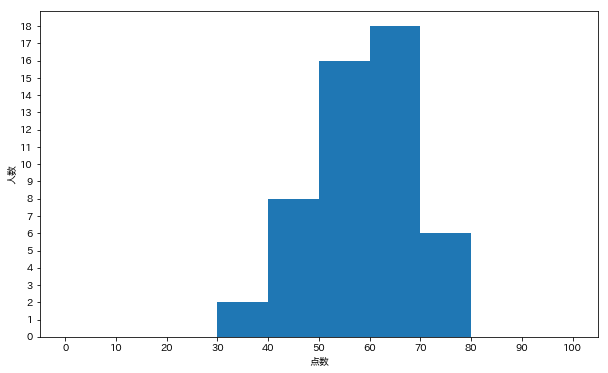

In [55]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _  = ax.hist(english_scores, bins=10, range=(0,100)) 
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

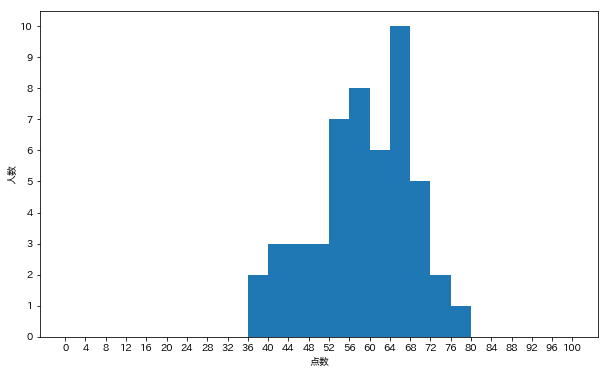

In [56]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _  = ax.hist(english_scores, bins=25, range=(0,100)) 
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

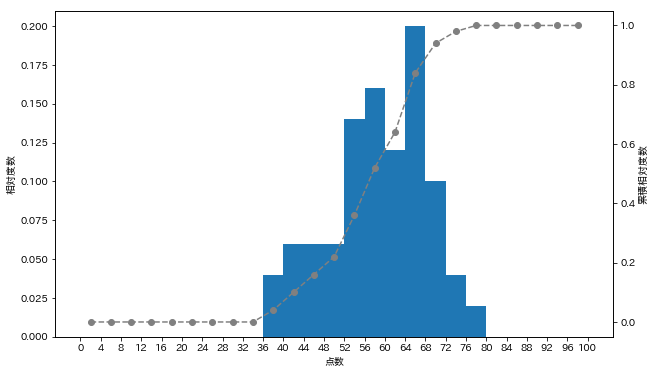

In [57]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights=np.ones_like(english_scores)/len(english_scores)
rel_freq, _ , _ = ax1.hist(english_scores, bins = 25, 
                          range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq,
        ls = '--', marker='o',color='gray')

ax2.grid(visible = False)


ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累積相対度数')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

### 2.4.3: 箱髭図

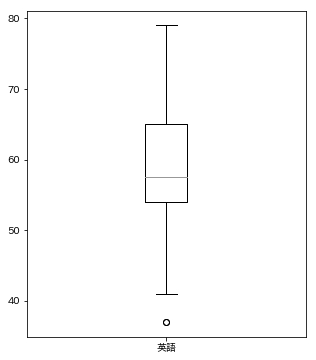

In [58]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['英語'])

plt.show()

# Chapter3: 2次元データの整理

In [61]:
# df2_scores_em

In [62]:
en_scores = np.array(df2_scores_em['英語'])[:10]
ma_scores = np.array(df2_scores_em['数学'])[:10]

In [64]:
scores_df2 = pd.DataFrame({'英語':en_scores, '数学':ma_scores}, index=pd.Index(['A','B','C','D','E',
                                                                           'F','G','H','I','J'],
                                                                          name='生徒'))

In [65]:
scores_df2

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 3.1 : 2つのデータの関係性の指標
### 3.1.1 : 共分散

In [66]:
summary_df = scores_df2.copy()
summary_df['英語の偏差'] =\
    summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] =\
    summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] =\
    summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [67]:
summary_df['偏差同士の積'].mean()

62.8

In [68]:
# 共分散行列
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [69]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

### 3.1.2 : 相関係数

$$ 
r_{xy} = \frac{S_{xy}}{S_xS_y} \\
= \frac{1}{n}\sum_{i=1}^{n} (\frac{x_i-\bar{x}}{S_x})(\frac{y_i-\bar{y}}{S_y})
$$

In [70]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] /\
(np.std(en_scores)* np.std(ma_scores))

0.8185692341186713

In [71]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [72]:
scores_df2.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


## 3.2 : 2次元データの視覚化
### 3.2.1 : 散布図

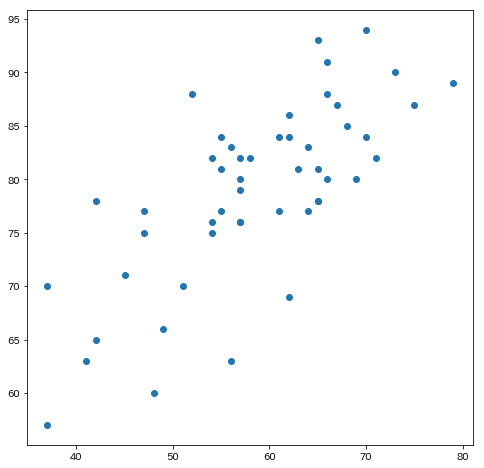

In [76]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df2_scores_em['英語'], df2_scores_em['数学'])

### 3.2.2 : 回帰直線

In [198]:
test_input = '''5 2

2016-01-01 00:00:00 177
2016-01-01 00:39:49 133
2016-01-01 01:35:41 488
2016-01-01 01:46:43 740
2016-01-01 02:05:34 465

2016-01-01 02:05:33 2016-01-01 02:05:38
2015-12-31 23:59:58 2016-01-01 01:46:48'''